In [24]:
using Distributions
using StatsFuns
using StatsBase
using StatsPlots
default(fmt=:png, titlefontsize=10, size=(400, 250))

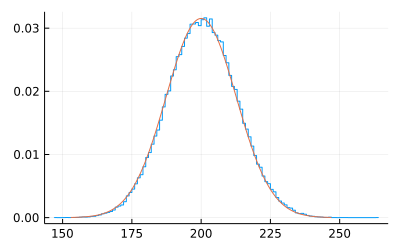

In [19]:
n, p = 1000, 0.20
bin = Binomial(n, p)
K = rand(bin, 10^5)
stephist(K; norm=true, label="")
plot!(Normal(n*p, √(n*p*(1-p))); label="")

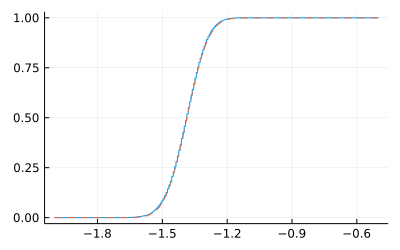

In [32]:
X = logit.(K/n)
F_X = ecdf(X)
plot(x -> F_X(x), -2, -0.5; label="")
plot!(x -> cdf(Normal(logit(p), 1/√(n*p*(1-p))), x), -2, -0.5; label="", ls=:dash)

In [63]:
safemul(x, y) = x == 0 ? x : isinf(x) ? typeof(x)(Inf) : x*y
safediv(x, y) = x == 0 ? x : isinf(y) ? zero(y) : x/y

function pvalue_wilson(n, k, p)
    p̂ = k/n
    SE_p̂ = √(p*(1-p)/n)
    Z = safediv(p̂ - p, SE_p̂)
    2ccdf(Normal(), abs(Z))
end

function pvalue_wald(n, k, p)
    p̂ = k/n
    SEhat_p̂ = √(p̂*(1-p̂)/n)
    Z = safediv(p̂ - p, SEhat_p̂)
    2ccdf(Normal(0, 1), abs(Z))
end

function pvalue_logit_wald(n, k, p)
    p̂ = k/n
    SEhat_logit_p̂ = 1/√(n*p̂*(1-p̂))
    Z = safediv(logit(p̂) - logit(p), SEhat_logit_p̂)
    2ccdf(Normal(0, 1), abs(Z))
end

pvalue_logit_wald (generic function with 1 method)

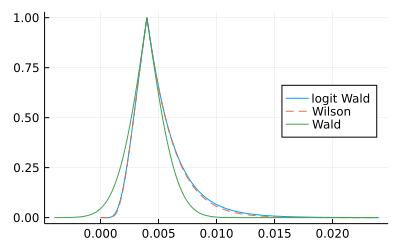

In [73]:
n, k = 1000, 4
a, b = k/n - 4*√(k/n*(1-k/n)/n), k/n + 10*√(k/n*(1-k/n)/n)
plot(; legend=:right)
plot!(p -> pvalue_logit_wald(n, k, p), a, b; label="logit Wald")
plot!(p -> pvalue_wilson(n, k, p), a, b; label="Wilson", ls=:dash)
plot!(p -> pvalue_wald(n, k, p), a, b; label="Wald")